# **Reporte de Datos**
---

In [1]:
# Librerias
import os
import pandas as pd
import requests
import logging
import matplotlib.pyplot as plt

In [2]:
# Funcion para crear el objeto de creación de logs
def create_logger():
  logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levenname)s - %(message)s')
  logger = logging.getLogger('Logger')
  logger.info('Logger creado')
  return logger

In [3]:
# Función de consumo a la base de datos de Firebase para cargar el DataSet
def download_firebase(url, logger):
  logger.info("Extrayendo el archivo desde Firebase")
  df = None
  try:
    df = pd.read_csv(url)
    logger.info("Archivo cargado")
  except requests.exceptions.RequestException as e:
    logger.info(f"Error al descargar el archivo CSV: {e}")
  except pd.errors.EmptyDataError:
    logger.info("El archivo CSV está vacío.")
  except Exception as e:
    logger.info(f"Ocurrió un error inesperado: {e}")
  return df

In [4]:
# Cargar DataSet
url = 'https://firebasestorage.googleapis.com/v0/b/personalwp-8822c.appspot.com/o/diabetes_prediction_dataset.csv?alt=media&token=4d70d154-c3d0-4fa0-a3aa-9b9972dd3b95'
logger = create_logger()
df = download_firebase(url, logger)

## **Resumen General de los Datos**

In [5]:
# Información del DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
# Obtener el uso de memoria en bytes
mem_usage = df.memory_usage(deep=True).sum()
mem_usage_mb = mem_usage / 1024**2
print("Tamaño del DataFrame: {:.2f} MB".format(mem_usage_mb))

Tamaño del DataFrame: 17.31 MB


In [7]:
# Cinco primeros registros
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
# Descripción estadística de los datos numéricos del DataSet
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## **Variable Objetivo**

In [10]:
# Cantida de valores en la columna 'diabetes'
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


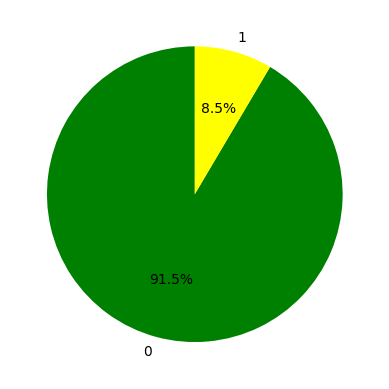

In [13]:
# Pie de 'diabetes'
plt.pie(df['diabetes'].value_counts(), labels = df['diabetes'].value_counts().index, autopct = '%1.1f%%', startangle = 90, colors = ['green','yellow'])
plt.show()

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*